<a href="https://colab.research.google.com/github/HSS107048212/2023Depositar_Catagorical_RecommmandationSystem/blob/main/Unsupervised_learning_in_GAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

In [55]:
import torch_geometric

In [56]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from sklearn.cluster import KMeans
import numpy as np

# 假設的圖形數據
num_nodes = 10  # 節點數量
num_features = 16  # 每個節點的特徵數量
num_classes = 3  # 最終的聚類數量

# 生成節點特徵
features = torch.rand((num_nodes, num_features))

# 隨機生成邊
#edges = torch.randint(0, num_nodes, (2, 2 * num_nodes))

# 定義 GAT 模型
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# 初始化模型
model = GAT(num_features, 8, num_classes)

# 模擬訓練過程（這裡僅為展示，不執行實際的訓練）
# 假設 'data' 是一個包含節點特徵和邊索引的對象
# data.x = features
# data.edge_index = edges

# 假設的節點表示（經過模型學習後的特徵）
node_embeddings = torch.rand((num_nodes, num_classes))  # 使用隨機數據代替實際模型輸出

# 使用 K-means 進行聚類
kmeans = KMeans(n_clusters=num_classes)
cluster_ids = kmeans.fit_predict(node_embeddings.numpy())




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.0 MB/s eta 0:00:00


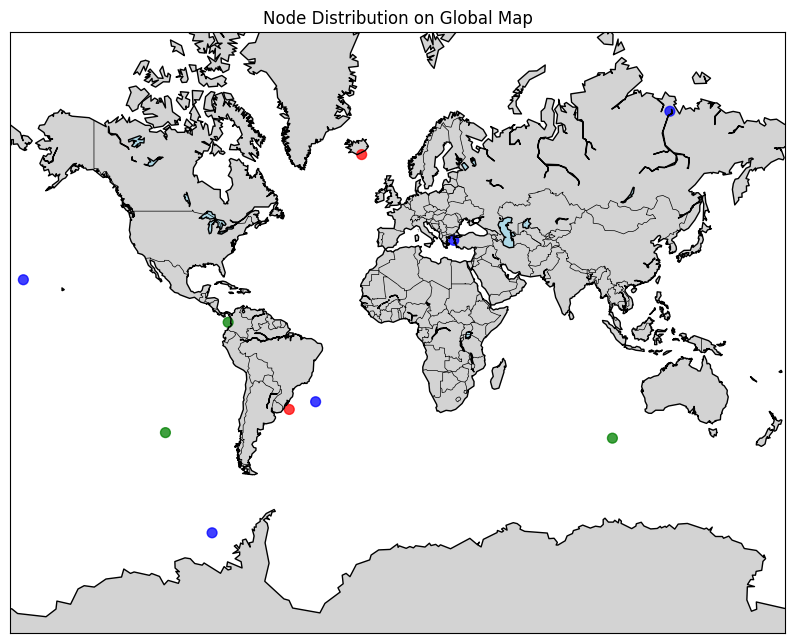

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# 假設的座標，這裡使用隨機生成的座標作為示例
# 這些座標應該在一定範圍內，例如某個城市或區域的經緯度
latitudes = np.random.uniform(low=-90, high=90, size=num_nodes)
longitudes = np.random.uniform(low=-180, high=180, size=num_nodes)

# 使用 Basemap 繪製地圖
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')

# 將經緯度轉換為地圖上的 x, y 座標
x, y = m(longitudes, latitudes)

# 繪製節點
m.scatter(x, y, s=50, c=node_colors, marker='o', alpha=0.75)

plt.title("Node Distribution on Global Map")
plt.show()


In [58]:
pos

{0: array([0.12992243, 1.        ]),
 1: array([0.97943127, 0.13068703]),
 2: array([-0.69259985, -0.72003613]),
 3: array([-0.9031464 ,  0.41280918]),
 4: array([0.67491484, 0.67930342]),
 5: array([-0.5345323 ,  0.91587353]),
 6: array([ 0.91661034, -0.53482261]),
 7: array([-0.14923148, -0.90678912]),
 8: array([-0.84014015, -0.14325486]),
 9: array([ 0.41877131, -0.83377043])}